# Import

### Librerie

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import *

D:\Anaconda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Dataset

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
test_split=round(len(dataset)*0.20)
df_for_training=dataset[:-test_split]
df_for_testing=dataset[-test_split:]
print("shape del training set: {}".format(df_for_training.shape))
print("shape del test set: {}".format(df_for_testing.shape))


shape del training set: (1000427, 6)
shape del test set: (250107, 6)


In [4]:
# Normalizzazione
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled= scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.11842309, 0.4892513 , 0.51676206, 0.54466859, 0.45378151,
        0.56907478],
       [0.01527774, 0.46182357, 0.40719542, 0.46493756, 0.3557423 ,
        0.55513308],
       [0.41996658, 0.42772424, 0.42763696, 0.48991354, 0.42577031,
        0.52471483],
       ...,
       [0.62809509, 0.48851001, 0.65004088, 0.67819404, 0.50840336,
        0.69835234],
       [0.36555162, 0.46478873, 0.60834015, 0.63208453, 0.49019608,
        0.65652725],
       [0.21755008, 0.41363973, 0.64431725, 0.76945245, 0.4859944 ,
        0.84030418]])

In [5]:
#n_past is the number of step we will look in the past to predict the next target value.
col2pred = 4  # 0:steps, 1:bedin, 2:bedout, 3:sleep duration, 4:deep duration, 5:lightduration
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            #per ogni feature fa l'append dei precedenti
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            
            dataY.append(dataset[i,col2pred])
    return np.array(dataX),np.array(dataY)

window_size = 7
trainX,trainY=createXY(df_for_training_scaled,window_size)
testX,testY=createXY(df_for_testing_scaled,window_size)

In [6]:
# features num
features_num = dataset.shape[1]

# LSTM

In [7]:
#Creazione del modello
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(window_size,features_num)))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             11400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,651
Trainable params: 31,651
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(trainX, trainY, epochs = 100, verbose = 1, batch_size = 1024, validation_split=0.2) # 8192

Epoch 1/100
782/782 [==============================] - 11s 9ms/step - loss: 0.0171 - val_loss: 0.0151
Epoch 2/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0156 - val_loss: 0.0150
Epoch 3/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 4/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0151 - val_loss: 0.0149
Epoch 5/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 6/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0149 - val_loss: 0.0151
Epoch 7/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0149 - val_loss: 0.0149
Epoch 8/100
782/782 [==============================] - 6s 7ms/step - loss: 0.0148 - val_loss: 0.0149
Epoch 9/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0148 - val_loss: 0.0149
Epoch 10/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0148 - val_l

782/782 [==============================] - 6s 8ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 82/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 83/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0146 - val_loss: 0.0149
Epoch 84/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0146 - val_loss: 0.0149
Epoch 85/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 86/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 87/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 88/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 89/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 90/100
782/782 [==============================] - 6s 8ms/step - loss: 0.0146 - val_loss: 

In [9]:
prediction_train = model.predict(trainX)
print("prediction\n", prediction_train)
print("\nPrediction Shape-", prediction_train.shape)

prediction_train_copies_array = np.repeat(prediction_train, 6, axis=-1)
pred_train = scaler.inverse_transform(np.reshape(prediction_train_copies_array, (len(prediction_train), 6)))[:, col2pred]
true_value_train_copies_array = np.repeat(trainY, 6, axis=-1)
true_value_train = scaler.inverse_transform(np.reshape(true_value_train_copies_array, (len(trainY), 6)))[:, col2pred]

prediction_test=model.predict(testX)
print("prediction\n", prediction_test)
print("\nPrediction Shape-",prediction_test.shape)

prediction_copies_test_array = np.repeat(prediction_test,6, axis=-1)
pred_test=scaler.inverse_transform(np.reshape(prediction_copies_test_array,(len(prediction_test),6)))[:,col2pred]
true_value_test_copies_array = np.repeat(testY,6, axis=-1)
true_value_test=scaler.inverse_transform(np.reshape(true_value_test_copies_array,(len(testY),6)))[:,col2pred]

31264/31264 [==============================] - 77s 2ms/step
prediction
 [[0.41286397]
 [0.4244931 ]
 [0.39834344]
 ...
 [0.45711878]
 [0.43673697]
 [0.43703672]]

Prediction Shape- (1000420, 1)
7816/7816 [==============================] - 20s 3ms/step
prediction
 [[0.45546573]
 [0.48938575]
 [0.505528  ]
 ...
 [0.41226235]
 [0.41862956]
 [0.42326963]]

Prediction Shape- (250100, 1)


**********TRAIN-SET***********
MAE: 0.665
MSE: 0.741
RMSE: 0.741
**********TEST-SET***********
MAE: 0.679
MSE: 0.769
RMSE: 0.769


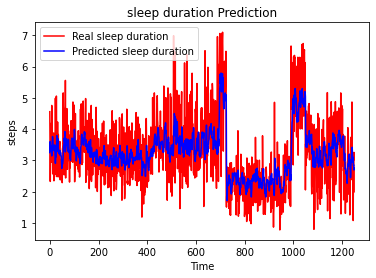

In [10]:
def metrics(true_value_train, pred_value_train, true_value_test, pred_value_test):
    print("**********TRAIN-SET***********")
    print("MAE: {:.3f}".format(mean_absolute_error(
        true_value_train, pred_value_train)))
    print("MSE: {:.3f}".format(
        mean_squared_error(true_value_train, pred_value_train)))
    print("RMSE: {:.3f}".format(
        mean_squared_error(true_value_train, pred_value_train, squared=True)))
    # metrics test set
    print("**********TEST-SET***********")
    print("MAE: {:.3f}".format(mean_absolute_error(
        true_value_test, pred_value_test)))
    print("MSE: {:.3f}".format(
        mean_squared_error(true_value_test, pred_value_test)))
    print("RMSE: {:.3f}".format(
        mean_squared_error(true_value_test, pred_value_test, squared=True)))
    

    plt.plot(true_value_test[:1250], color='red', label='Real sleep duration')
    plt.plot(pred_value_test[:1250], color='blue', label='Predicted sleep duration')
    plt.title('sleep duration Prediction')
    plt.xlabel('Time')
    plt.ylabel('steps')
    plt.legend()
    plt.show()


metrics(true_value_train, pred_train, true_value_test, pred_test)
